In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Prima di tutto importiamo Pandas per annalizzare il nostro DATASET "access_electricity.csv"

In [5]:
import pandas as pd

In [7]:
access = pd.read_csv("/content/access_electricity.csv")

###  DESCRIZIONE DEL DATASET.

*   Descrizione:
Questo dataset contiene misure di accesso all'’'elettricità per paesi del mondo.





In [32]:
access.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', 'Continent'],
      dtype='object')

In [9]:
access.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


### ESPLORAZIONE INIZIALE: Numero di dati (righe e colonne), Tipo di dati.





In [24]:
access.shape

(242, 10)

In [26]:
access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  242 non-null    object
 5   2013 [YR2013]  242 non-null    object
 6   2014 [YR2014]  242 non-null    object
 7   2015 [YR2015]  242 non-null    object
 8   2016 [YR2016]  242 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


##COMMENTO
Il dataset contiene 242 osservazioni e 10 variabili. I dati caricati sono tutti di tipo object; le colonne che rappresentano gli anni (2012-2016) non sono ancora numeriche e quindi dovranno essere convertite in formato numerico prima di effettuare analisi statistiche e visualizzazioni. La variabile Continent presenta valori mancanti (228 valori non nulli su 242).

### 4 selezioni dei dati motivate (commento per ciascuna), 2 delle quali usanto .loc[] e .iloc[]

### 1) selezioniamo solo la serie principale per lavorare su una sola metrica reale non mescolata.

In [35]:
def_access = access[access['Series Name'] == 'Access to electricity (% of population)']
def_access


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
...,...,...,...,...,...,...,...,...,...,...
237,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,99.9,100,100,Asia
238,World,WLD,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.0690998889319,85.1886892166901,85.7179827560055,87.0559229562313,87.3784431778704,NaN
239,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,65.9421005249023,75.6,66.1,70.2139053344727,71.6423492431641,Asia
240,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,24.8946666717529,25.4697017669678,27.9,31.1,27.2193374633789,Africa


### COMMENTO
Selezioniano solo le righe relative alla serie principale di accesso all’elettricità per evitare confusione con serie secondarie (urban/rural ecc).



### 2) selezione solo le colonne anni per analisi temporale.

In [37]:
access_years = access.loc[:, ['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
access_years


,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,69.1,67.2595520019531,89.5,71.5,84.1371383666992
1,100,100,100,100,100
2,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918
3,..,..,..,..,..
4,100,100,100,100,100
...,...,...,...,...,...
237,100,100,99.9,100,100
238,85.0690998889319,85.1886892166901,85.7179827560055,87.0559229562313,87.3784431778704
239,65.9421005249023,75.6,66.1,70.2139053344727,71.6423492431641
240,24.8946666717529,25.4697017669678,27.9,31.1,27.2193374633789


### commento
Estraiamo solo le colonne degli anni perché sono quelle che analizzeremo statisticamente nel tempo.

### 3) selezione prime 10 righe per controllo qualità dati iniziale

In [42]:
sample= access.iloc[0:10]
sample


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964263916,36.9904899597168,32,42,40.5206069946289,Africa
6,Antigua and Barbuda,ATG,Access to electricity (% of population),EG.ELC.ACCS.ZS,95.2546920776367,95.773551940918,96.2984161376953,96.8262939453125,97.3546676635742,North America
7,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,87.2882439402148,88.3897051476481,88.0767741380158,88.5179673938546,88.7686540243445,Asia
8,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.5844116210938,99.8371276855469,99.9592437744141,99.9952087402344,100,South America
9,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.8788757324219,99.9540557861328,99.9889755249023,100,100,Asia


### COMMENTO
controliamo errori o pattern strani dalla prima all'ultima colona.

## 4) selezione solo paesi Europei.

In [44]:
access_Eu = access[access['Continent'] == 'Europe']
access_Eu


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
12,Austria,AUT,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
18,Belarus,BLR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
19,Belgium,BEL,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
25,Bosnia and Herzegovina,BIH,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9866180419922,99.9984893798828,100,100,100,Europe
30,Bulgaria,BGR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
40,Channel Islands,CHI,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
49,Croatia,HRV,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
53,Czech Republic,CZE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


## COMMENTO
Isoliamo solo i paesi europei per poter fare analisi e visualizzazioni focalizzate su una singola macro area geografica.

###  2 riodinamenti (1 ascendente e 1 discendente) di due variabili a scelta motivate (commento per ciascuno).

## Ordiniamo i paesi in base al valore del 2016 in modo crescente per individuare quali sono i paesi con i livelli più bassi di accesso all’elettricità.

In [48]:
ord_asc = def_access.sort_values(by='2016 [YR2016]', ascending=True)
ord_asc



,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
28,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,North America
167,OECD members,OED,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9136463441529,99.9868594717126,99.9192998171263,..,..,NaN
120,Latvia,LVA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
97,Iceland,ISL,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
...,...,...,...,...,...,...,...,...,...,...
60,Ecuador,ECU,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.194929,98.034674,98.976067,98.825883,99.9368133544922,South America
93,High income,HIC,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9473345778811,99.9502957252381,99.9688156109534,99.9688142637102,99.9767391408547,NaN
116,Kyrgyz Republic,KGZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.8,99.7314758300781,99.8,99.9065551757813,99.9961013793945,Asia
70,Europe & Central Asia (excluding high income),ECA,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.950379721948,99.9882302510405,99.9901355087253,99.9982315995547,99.9999426436103,NaN


Ordiniamo i paesi in base al valore del 2016 in modo decrescente per individuare i paesi con la migliore performance nell’accesso all’elettricità.

In [49]:
ord_desc = def_access.sort_values(by='2016 [YR2016]', ascending=False)
ord_desc


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
69,Europe & Central Asia,ECS,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9776246363385,99.9946856145517,99.9955405950803,99.9991994861266,99.9999740023915,NaN
70,Europe & Central Asia (excluding high income),ECA,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.950379721948,99.9882302510405,99.9901355087253,99.9982315995547,99.9999426436103,NaN
116,Kyrgyz Republic,KGZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.8,99.7314758300781,99.8,99.9065551757813,99.9961013793945,Asia
93,High income,HIC,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9473345778811,99.9502957252381,99.9688156109534,99.9688142637102,99.9767391408547,NaN
60,Ecuador,ECU,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.194929,98.034674,98.976067,98.825883,99.9368133544922,South America
...,...,...,...,...,...,...,...,...,...,...
152,Morocco,MAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,95.1765670776367,97.3740081787109,91.6,99.5860137939453,100,Africa
165,Northern Mariana Islands,MNP,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Oceania
167,OECD members,OED,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9136463441529,99.9868594717126,99.9192998171263,..,..,NaN
28,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,North America


### 1 nuova colonna creata usando apply e lambda (commento).

## Creiamo una nuova variabile “media_5_anni” utilizzando apply con lambda per calcolare la media dei valori degli anni disponibili per ogni paese. Questo permette di avere una misura sintetica unica rappresentativa del livello medio di accesso all’elettricità negli ultimi 5 anni.

In [54]:
year_cols = ['2012 [YR2012]','2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]']
def_access[year_cols] = def_access[year_cols].apply(pd.to_numeric, errors='coerce')


In [55]:
def_access['media_5_anni'] = def_access[year_cols].apply(lambda x: x.mean(), axis=1)
def_access


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent,media_5_anni
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.100000,67.259552,89.500000,71.500000,84.137138,Asia,76.299338
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,100.000000
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.764660,99.134987,99.234344,99.336708,99.439568,Africa,99.182053
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,Oceania,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
237,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,99.900000,100.000000,100.000000,Asia,99.980000
238,World,WLD,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.069100,85.188689,85.717983,87.055923,87.378443,NaN,86.082028
239,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,65.942101,75.600000,66.100000,70.213905,71.642349,Asia,69.899671
240,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,24.894667,25.469702,27.900000,31.100000,27.219337,Africa,27.316741


### 5 grafici comprensivi di titolo, labels e interpretazione (commento per ciascuno) di cui almeno 1 boxplot, 1 istogramma e 1 scatterplot usando sia Matplotlib che Seaborn.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Conversione colonne anni

In [59]:

year_cols = ['2012 [YR2012]','2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]']
def_access[year_cols] = def_access[year_cols].apply(pd.to_numeric, errors='coerce')
year_cols

['2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]',
 '2015 [YR2015]',
 '2016 [YR2016]']

### Boxplot per continente (Seaborn)

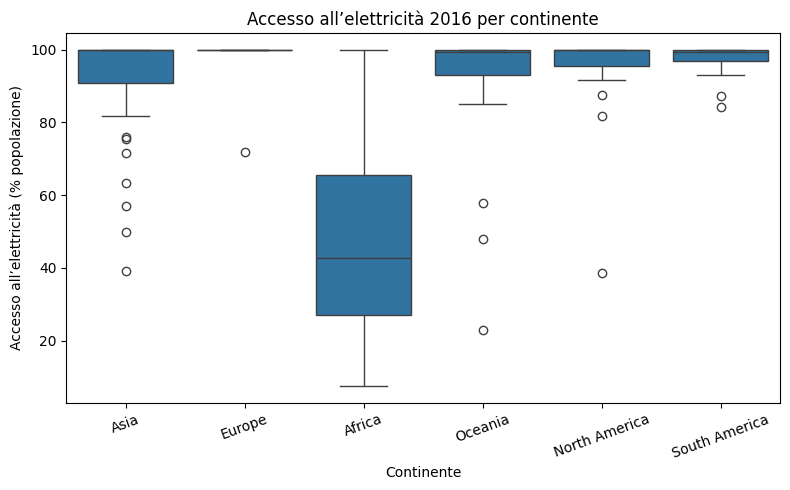

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(data=def_access, x='Continent', y='2016 [YR2016]')
plt.title('Accesso all’elettricità 2016 per continente')
plt.xlabel('Continente')
plt.ylabel('Accesso all’elettricità (% popolazione)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


###interpretazione:
Nel 2016 il continente con la situazione più critica è l’Africa, che mostra una mediana nettamente più bassa rispetto agli altri continenti e una elevata variabilità interna. Europa, Nord America e Sud America mostrano valori molto alti e molto concentrati verso il 100%, con scarsa dispersione. Asia e Oceania presentano valori complessivamente alti ma con più outlier, indicando che in questi continenti ci sono alcuni paesi che rimangono molto indietro rispetto alla media della loro regione. In generale quindi le disuguaglianze più marcate nel mondo sull’accesso all’elettricità sono concentrate principalmente in Africa.

### Istogramma dell’anno 2016 (Matplotlib)

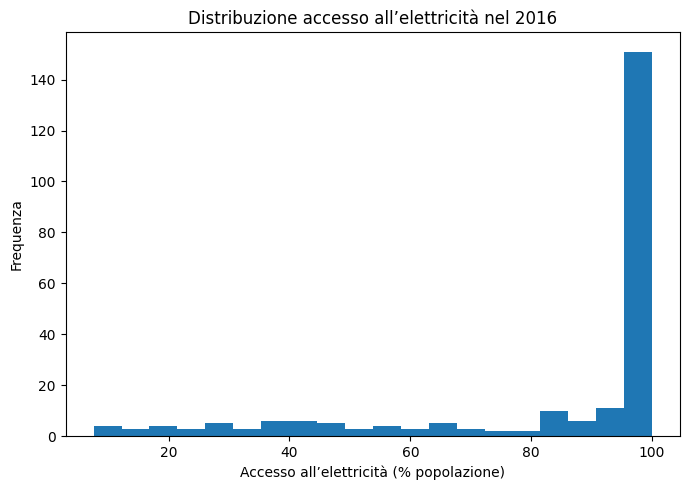

In [61]:
plt.figure(figsize=(7,5))
plt.hist(def_access['2016 [YR2016]'].dropna(), bins=20)
plt.title('Distribuzione accesso all’elettricità nel 2016')
plt.xlabel('Accesso all’elettricità (% popolazione)')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()


### Interpretazione:
La distribuzione mostra una concentrazione molto elevata nel range 90-100%. Questo indica che la maggior parte dei paesi ha ormai raggiunto livelli molto alti di accesso all’elettricità. Invece la parte sinistra della distribuzione presenta pochi paesi con valori molto bassi: questi costituiscono le eccezioni e rappresentano aree dove l’accesso rimane ancora critico. In sintesi la distribuzione è fortemente sbilanciata verso l’alto e non è simmetrica.

### Scatterplot 2012 vs 2016 (Seaborn)

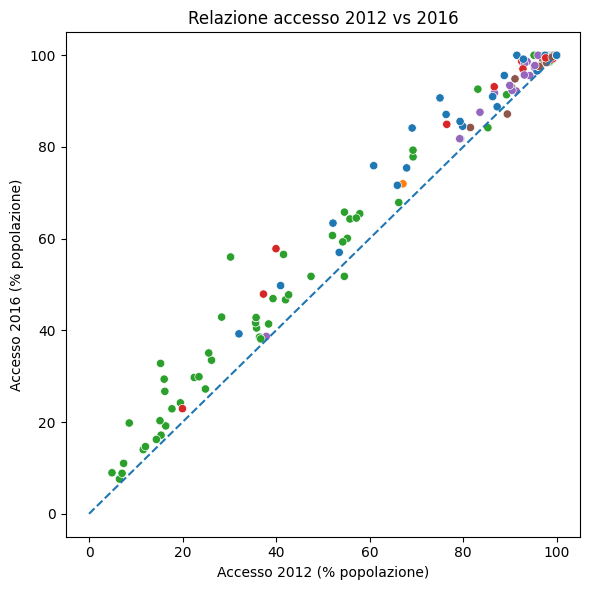

In [62]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=def_access,
    x='2012 [YR2012]',
    y='2016 [YR2016]',
    hue='Continent',
    legend=False
)
plt.title('Relazione accesso 2012 vs 2016')
plt.xlabel('Accesso 2012 (% popolazione)')
plt.ylabel('Accesso 2016 (% popolazione)')
plt.plot([0,100],[0,100], linestyle='--')  # linea 45°
plt.tight_layout()
plt.show()


### Interpretazione:
La maggior parte dei punti si trova sopra la linea diagonale, questo significa che per la grande maggioranza dei paesi il valore del 2016 è superiore al valore del 2012. Quindi in generale si osserva un miglioramento nel tempo dell’accesso all’elettricità. I paesi più distanti sopra la linea indicano miglioramenti più forti, mentre quelli più vicini alla linea hanno avuto una crescita più contenuta. In basso a sinistra rimangono pochi paesi con valori molto bassi in entrambi gli anni, che rappresentano i casi più critici.

### Media globale 2012–2016 (Matplotlib, line plot)

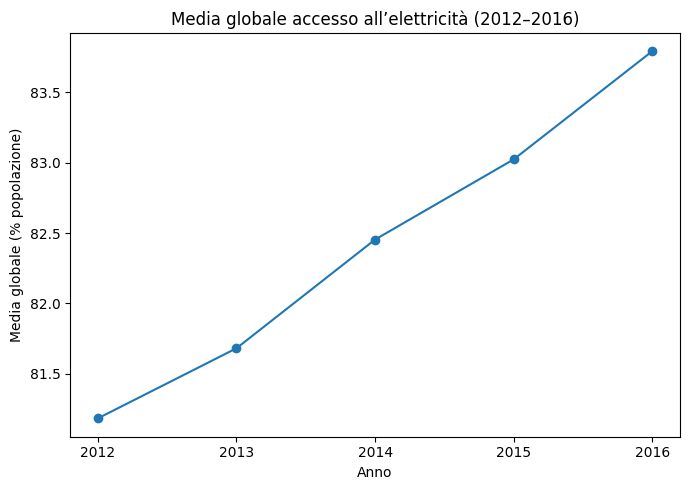

In [63]:
global_mean = def_access[year_cols].mean(skipna=True)
plt.figure(figsize=(7,5))
plt.plot(['2012','2013','2014','2015','2016'], global_mean.values, marker='o')
plt.title('Media globale accesso all’elettricità (2012–2016)')
plt.xlabel('Anno')
plt.ylabel('Media globale (% popolazione)')
plt.tight_layout()
plt.show()


### commento:
 La media globale dell’accesso all’elettricità mostra un trend costantemente crescente dal 2012 al 2016. Anche se l’incremento anno dopo anno non è enorme, l’andamento positivo è stabile e continuo. Questo indica che complessivamente a livello mondiale l’accesso all’elettricità sta migliorando nel tempo e che non ci sono stati anni di regressione. Ciò conferma una tendenza di progresso globale, anche se rimangono differenze importanti tra continenti e tra singoli paesi.

### Barplot: media per continente nel 2016 (Seaborn)

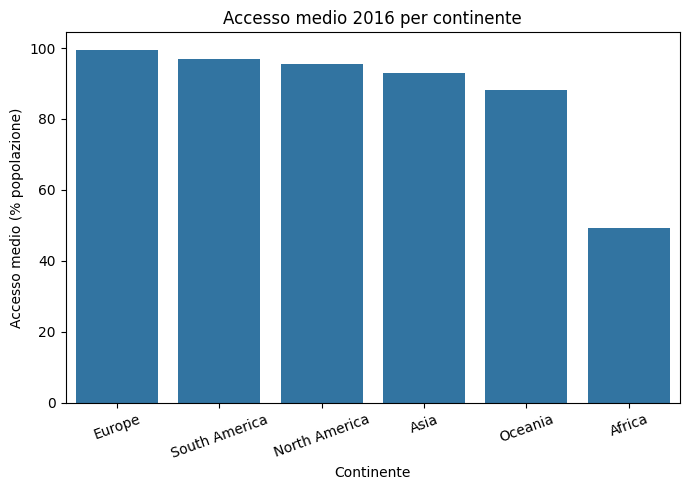

In [64]:
continent_mean_2016 = (def_access
                       .groupby('Continent', dropna=True)['2016 [YR2016]']
                       .mean()
                       .sort_values(ascending=False)
                       .reset_index())

plt.figure(figsize=(7,5))
sns.barplot(data=continent_mean_2016, x='Continent', y='2016 [YR2016]')
plt.title('Accesso medio 2016 per continente')
plt.xlabel('Continente')
plt.ylabel('Accesso medio (% popolazione)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


###Commento:
 Nel 2016 Europa, Sud America e Nord America mostrano livelli medi di accesso all’elettricità molto elevati, prossimi o praticamente pari al 100%. Anche Asia e Oceania presentano valori alti, seppur leggermente inferiori. L’unica forte eccezione è l’Africa, che evidenzia un valore medio decisamente più basso rispetto a tutti gli altri continenti. Questo conferma che il gap globale nella disponibilità di elettricità non è distribuito in modo uniforme, ma è fortemente concentrato a livello geografico e strutturalmente critico nel continente africano.

### IN PIU,

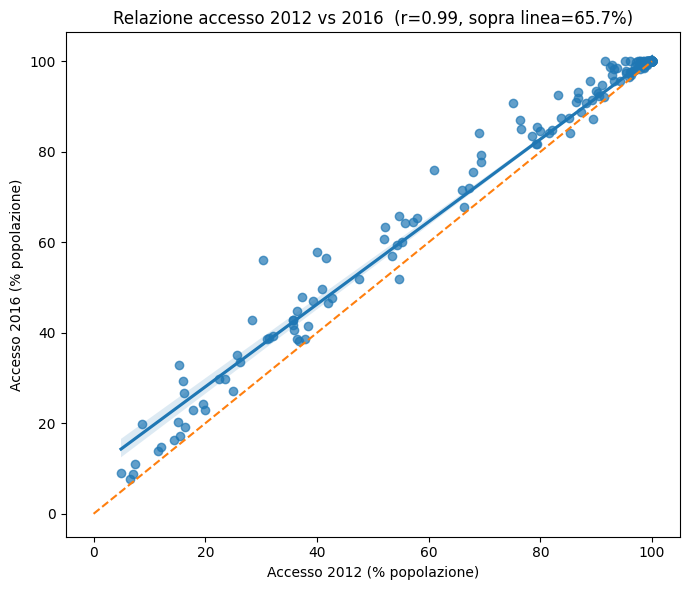

Correlazione Pearson r = 0.992
Paesi con 2016 > 2012 = 65.7%


In [67]:


year_cols = ['2012 [YR2012]','2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]']
def_access[year_cols] = def_access[year_cols].apply(pd.to_numeric, errors='coerce')

x = '2012 [YR2012]'
y = '2016 [YR2016]'
d = def_access[[x, y]].dropna()


r = d[x].corr(d[y])
share_above = (d[y] > d[x]).mean() * 100
plt.figure(figsize=(7,6))
sns.regplot(data=d, x=x, y=y, scatter_kws={'alpha':0.7})
plt.plot([0,100],[0,100], linestyle='--')
plt.title(f'Relazione accesso 2012 vs 2016  (r={r:.2f}, sopra linea={share_above:.1f}%)')
plt.xlabel('Accesso 2012 (% popolazione)')
plt.ylabel('Accesso 2016 (% popolazione)')
plt.tight_layout()
plt.show()

print(f"Correlazione Pearson r = {r:.3f}")
print(f"Paesi con 2016 > 2012 = {share_above:.1f}%")


###commento:
Idea di correlazione fortissima tra i valori del 2012 e quelli del 2016 (r=0.99). In più il 65.7% dei paesi si trova sopra la linea diagonale, quindi più della metà dei paesi nel 2016 ha un valore di accesso all’elettricità superiore rispetto al 2012. Questo dimostra che nel mondo c’è stato un miglioramento reale e diffuso dell’accesso all’elettricità nel tempo. Inoltre, il fatto che i punti seguano una relazione quasi lineare indica che chi era già in condizioni alte tende a mantenere o migliorare il livello, mentre chi era basso resta più distante: questo suggerisce un progresso globale, ma non uniforme, con gap persistenti nei paesi con valori bassi iniziali.

## Commento conclusivo
 L’analisi effettuata mostra che, a livello mondiale, l’accesso all’elettricità è globalmente aumentato tra il 2012 e il 2016. La distribuzione dei dati indica che la maggior parte dei paesi ha ormai raggiunto valori molto alti (vicini al 100%), mentre solo una parte minoritaria presenta livelli ancora critici. L’analisi per continente ha evidenziato in modo chiaro che le maggiori disuguaglianze si concentrano in Africa, che rimane l’area più distante dagli standard globali. Europa, Nord America e Sud America mostrano invece valori molto elevati e stabili, mentre Asia e Oceania presentano valori alti ma con maggiore presenza di outlier.

In generale, è emerso che i paesi che avevano valori più alti negli anni precedenti tendono a mantenere questo vantaggio nel tempo, mentre i paesi inizialmente più svantaggiati fanno più fatica a colmare il divario. Questo suggerisce che l’accesso all’elettricità non evolve in modo casuale ma segue un trend cumulativo: chi ha già buona infrastruttura continua a migliorare, mentre chi ha carenze strutturali necessita interventi maggiori.

Sviluppi futuri possibili potrebbero includere l’estensione dell’analisi a periodi temporali più recenti, l’integrazione con indicatori socio-economici (PIL, indice di sviluppo umano, stabilità politica) e modelli predittivi che stimino i prossimi anni per individuare quali aree globali rimangono maggiormente a rischio. Inoltre, analisi più mirate sulle politiche energetiche e sugli investimenti nei paesi più fragili potrebbero aiutare a capire quali strategie risultano più efficaci nel migliorare l’accesso all’elettricità in modo sostenibile e inclusivo.